#  Spark Streaming

## 실습 중심 스파크 스트리밍 

_____

## index

* why spark-streaming
    
    * streaming
    * spark
    * spark-streaming
    
* basic keywords
    * RDD
    * spark modules
        * streamingContext
        * sparkConf
        
        
_____

## Why spark-streaming?

### Streaming

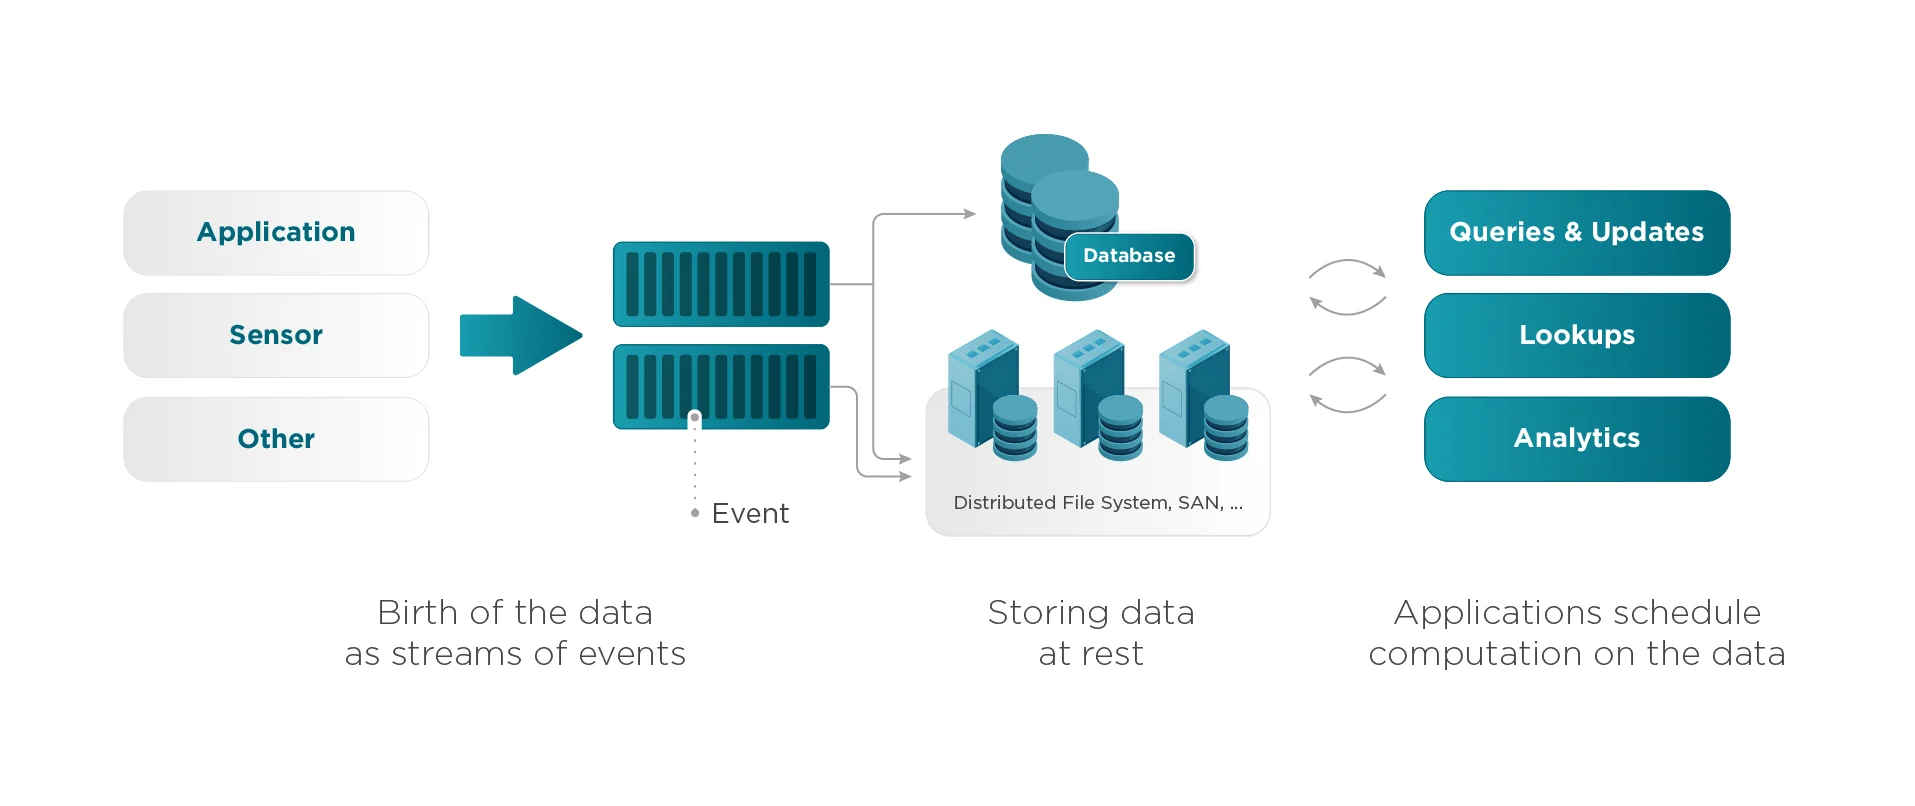
https://www.ververica.com/what-is-stream-processing


지금까지의 데이터 중 90% 이상이 최근 2년(2018) 안에 발생

→ 현재(2021)은 더 많음

자는 시간을 제외하면 하루종일 인터넷 사용함

빠른 의사 결정을 위한 실시간 처리




____

### Streaming VS mini batch

1. micro-batch : Apache SparkStreaming, vertica
    
    → 배치를 잘게 쪼개어(500ms~1s) 처리
    
    → 각 배치마다 초기화를 하는데, 이때 외부 자원과 연결하는 것, 처리에 필요한 데이터를 불러오는 것 등이 이루어져야 한다. 
    
    → micro-batch frequency가 잦아질수록, 프로그램 작동이 느려진다. 
    
2. stream processing : Apex, Flink, 카프카, 삼자 등

## Spark
___

### Spark-Streaming

실시간으로 들어오는 데이터를 처리하기 위한 모듈

다양한 데이터 소스 (Kafka, HDFS 등 ) 로부터 데이터를 받아서 실시간 스트리밍 처리
를 함 .

스트리밍 데이터를 구조적으로 ( 테이블 형태 ) 사용하려면 Spark Structured
Streaming 을 사용

Spark RDD 와 사용방법이 유사

lambda 아키텍쳐를 만들기 좋음

### DStream

스파크에서 돌아가는 원조 스트리밍

스파크 스트리밍에서 사용할 수 있도록 재구성한 데이터 형태

Discretized Stream(DStream): 불연속적 스트림

데이터를 끊어서 연속된 RDD 로 만들어 처리

데이터를 아주 짧은 주기로 처리

개발자가 지정한 단위의 시간동안 들어온 데이터를 , 묶음으로 Batch 처리를 하게 됨
일괄 처리 )

컴퓨터 프로그램 흐름에 따라 순차적으로 자료를 처리하는 방식

개별적으로 어떤 요청이 있을 때마다 실시간으로 통시하는 것이 아닌 한꺼번에

일괄적으로 대량 건을 처리하는 것

Batch processing(
새로운 디스트림을 만들어 낼 수 있는 트랜스포메이션 연산
외부 시스템에 데이터를 써주는 출력 연산
RDD 와 동일한 연산을 지원
시간 관련이나 슬라이딩 윈도우 같은 실시간 분석을 위한 특별한 기능도 지원

## Basic Keywords

### RDD

RDD Resilient Distributed Datasets

스파크의 기본 데이터 구조

분산 변경 불가능한 객체 모음

스파크의 모든 작업은 새로운 RDD 를 만들거나 존재하는 RDD 를 변형하거나 결과 계산
을 위해 RDD 에서 연산하는 것을 표현하고 있음

스파크는 빠른 mapreduce 작업을 RDD 개념을 이용해 사용

HDFS 에 접근하는 게 아닌 Memory 에 보관하여 실행시간을 줄여줌

### Spark Modules

* StreamingContext

스파크 스트리밍에서 사용하는 객체
DStream 을 생성하는 다양한 메서드를 제공
동일한 SparkContext 를 사용해서 StreamingContext 인스턴스를 여러개 생성할 수
있음
하지만 동일 JVM 에서는 StreamingContext 를 한 번에 하나 이상 시작할 수 없음
종료된 StreamingContext 는 다시 시작할 수 없음 .
대신 SparkContext 를 재사용해서 새로운 StreamingContext 를 생성하여 사용
소스 (DStream, RDD) 생성과 스트리밍 처리 시작 , 종료 등을 수행

* SparkConf

여러가지 설정을 저장
AppName 과 master 주소
Input DStream
Input data
를 표현하는 DStream, Receiver 와 연동
Receiver
건 별로 들어오는 데이터를 모아서 처리할 수 있도록 처리하는 친구
데이터를 받아서 Spark 메모리에 저장해놓음

___

# DEMO

## Twitter Example
___

## Architecture

* Module
    * streaming
        * SparkContext
        * StreamingContext
        * SQLContext
            * desc
    * visualization
        * display
        * matplotlib
        * seaborn

## SparkContext

In [ ]:
from pyspark import SparkContext
sc = SparkContext()

SparkContext()
Create a SparkContext that loads settings from system properties (for instance, when launching with ./bin/spark-submit).

public class SparkContext
extends Object
implements org.apache.spark.internal.Logging

Main entry point for Spark functionality. A SparkContext represents the connection to a Spark cluster, and can be used to create RDDs, accumulators and broadcast variables on that cluster.

Note:
    Only one SparkContext should be active per JVM. You must stop() the active SparkContext before creating a new one. param: config a Spark Config object describing the application configuration. Any settings in this config overrides the default configs as well as system properties. 

https://spark.apache.org/docs/latest/api/java/org/apache/spark/SparkContext.html

## StreamingContext

In [ ]:
from pyspark.streaming import StreamingContext
ssc = StreamingContext(sc, 10 )

주어진 serialize된 스트림의 소스 및 대상을 설명하고 추가 호출자 정의 컨텍스트를 제공합니다.

https://datafloq.com/read/spark-streaming-understanding-streamingcontext/5859

https://docs.microsoft.com/ko-kr/dotnet/api/system.runtime.serialization.streamingcontext?view=net-5.0

## SQLContext

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

https://spark.apache.org/docs/1.6.1/sql-programming-guide.html

- 윈도우 집계 : 갑자기 SQL ??

![Screenshot from 2021-09-16 12-06-25.png](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/69054c11-e12f-4831-af6e-bbaa812095fa/Screenshot_from_2021-09-16_12-06-25.png)

- 윈도우 함수 : Window Function
    - **파티션을 분할한다는 의미**에서는 유사하다.
    - 행과 행 간의 관계를 정의하기 위해 제공되는 함수
    - 순위, 합계, 평균, 행 위치 등을 조작할 수 있다.
- 집계 윈도우 함수 AGGREGATE Function
    - SUM : 파티션별로 합계를 계산한다.
    - AVG : 파티션 별로 평균을 계산한다.
    - COUNT : 파티션 별로 행 수를 계산한다.
    - MAX와 MIN : 파티션 별로 최댓값과 최솟값을 계산한다.
- 텀블링 윈도우 : (그룹별 집계)

    윈도우 모드 쿼리가 **비중첩 방식으로 각 윈도우를 처리**하는 경우 

    이 윈도우를 **텀블링 윈도우**라고 합니다. 

    이 경우 **인애플리케이션 스트림의 각 레코드**는 특정 윈도우에 속합니다. 

    쿼리가 레코드가 속한 윈도우를 처리할 때 한 번만 처리됩니다.

    ![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/d6e25f45-4129-4541-8348-6bf87cc8e2e4/Untitled.png)

- 슬라이딩 윈도우

    좀더 짧은 보고 기간으로 처리

    - 5초 윈도우를 가정합니다. 5초 윈도우가 시간 경과에 따라 연속적으로 이동합니다.
    - 

        윈도우로 들어오는 모든 행에 대해 출력 행이 슬라이딩 윈도우에 의해 방출됩니다. 애플리케이션이 시작되면 바로 5초 윈도우가 지나가지 않은 상태에서도
                                                     스트림 상에 나타나는 모든 새 레코드에 대해 쿼리가 출력을 방출합니다. 예를 들어, 레코드가 처음 1초와 그 다음 1초에 나타날 때 쿼리가 출력을
                                                     방출합니다. 나중에 쿼리는 5초 윈도우에서 레코드를 처리합니다.

    - 

        윈도우는 시간 경과에 따라 이동합니다. 스트림 상의 오래된 레코드가 윈도우를 벗어나는 경우, 5초 윈도우에 속하는 새 레코드가 스트림에 나타나지 않는
                                                     한 쿼리가 출력을 방출하지 않습니다.

    GROUP BY를 사용하여 레코드를 그룹화하는 대신 시간 기반 또는 행 기반 윈도우를 정의할 수 있습니다. 명시적 WINDOW 절을 추가함으로써 이를 수행합니다.

    이 경우 윈도우가 시간에 따라 이동하므로 Amazon Kinesis Data Analytics 은 (는) 새 레코드가 스트림에 나타날 때 출력을 방출합니다.
                                        Kinesis Data Analytics 은 창에서 행을 처리하여 이 출력을 내보냅니다. 윈도우는 이러한 유형의 처리에서 중첩될 수 있으며, 레코드는
                                        복수의 윈도우의 일부일 수 있고 각 윈도우에서 처리될 수 있습니다. 다음 예제는 슬라이딩 윈도우에 대한 설명입니다.

    스트림 상에서 레코드를 계수하는 간단한 쿼리를 생각해 보겠습니다. 이 예제에서는 5초 윈도우를 가정합니다. 다음 예제 스트림에서, 새로운 레코드는
                                        시간 t에 도착1, t2, t6및 t7, 세 개의 레코드가 시간 t에 도착합니다.8초.

![Untitled](https://s3-us-west-2.amazonaws.com/secure.notion-static.com/bb09f429-bfe2-4abb-8abf-7777f1944a53/Untitled.png)

___

# Twitter Example
Set up the credentials for a twitter app at https://apps.twitter.com/
    
install python-twitter, a python library to connect your Python to the twitter dev account.

Begin by running the TweetRead.py file. Make sure to add your own IP Adress and your credential keys.

In [1]:
import findspark

In [ ]:
# your path will likely not have 'matthew' in it. Change it to reflect your path.
findspark.init('/home/tomato/spark-3.1.2-bin-hadoop3.2')

In [3]:
# May cause deprecation warnings, safe to ignore, they aren't errors
from pyspark import SparkContext
from pyspark.streaming import StreamingContext
from pyspark.sql import SQLContext
from pyspark.sql.functions import desc

In [4]:
# Can only run this once. restart your kernel for any errors.
sc = SparkContext()

In [5]:
ssc = StreamingContext(sc, 10 )
sqlContext = SQLContext(sc)

In [6]:
socket_stream = ssc.socketTextStream("127.0.0.1", 5555)

In [7]:
lines = socket_stream.window( 20 )

In [8]:
from collections import namedtuple
fields = ("tag", "count" )
Tweet = namedtuple( 'Tweet', fields )

In [9]:
# Use Parenthesis for multiple lines or use \.
( lines.flatMap( lambda text: text.split( " " ) ) #Splits to a list
  .filter( lambda word: word.lower().startswith("#") ) # Checks for hashtag calls
  .map( lambda word: ( word.lower(), 1 ) ) # Lower cases the word
  .reduceByKey( lambda a, b: a + b ) # Reduces
  .map( lambda rec: Tweet( rec[0], rec[1] ) ) # Stores in a Tweet Object
  .foreachRDD( lambda rdd: rdd.toDF().sort( desc("count") ) # Sorts Them in a DF
  .limit(10).registerTempTable("tweets") ) ) # Registers to a table.

__________
### Run the TweetRead.py file at this point
__________

In [10]:
import time
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas
# Only works for Jupyter Notebooks!
%matplotlib inline 

In [11]:
ssc.start()

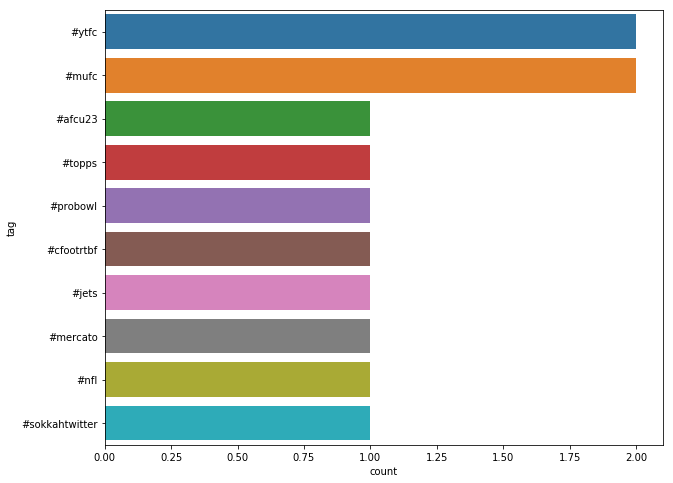

In [12]:
count = 0
while count < 10:
    
    time.sleep( 3 )
    top_10_tweets = sqlContext.sql( 'Select tag, count from tweets' )
    top_10_df = top_10_tweets.toPandas()
    display.clear_output(wait=True)
    plt.figure( figsize = ( 10, 8 ) )
    sns.barplot( x="count", y="tag", data=top_10_df)
    plt.show()
    count = count + 1

In [13]:
ssc.stop()